## Data inspection and analysis

In [2]:
import json
training_data_path = './data/hypatos-ds-train.json'
test_data_path = './data/hypatos-ds-test.json'
training_json = json.load(open(training_data_path,'r'))
test_json = json.load(open(test_data_path,'r'))

In [4]:
from tqdm import tqdm
import numpy as np
dictionary = []
i = 0
for document in tqdm(training_json):
    for word_json in document['words']:
        dictionary += [str(word_json['value'])]
#     dictionary = np.unique(dictionary)
    i += 1
    if i == 1000:
        dictionary = np.unique(dictionary).tolist()
        i = 0
dictionary += ['OTHER']
dictionary = np.unique(dictionary).tolist()


100%|██████████| 24073/24073 [00:58<00:00, 414.02it/s]


In [5]:
#frequency of words histogram
import matplotlib
import matplotlib.pyplot as plt

training_count = {word : 0 for word in dictionary}
for document in tqdm(training_json):
    for word_json in document['words']:
        word = str(word_json['value'])
        training_count[word] += 1

100%|██████████| 24073/24073 [00:10<00:00, 2253.49it/s]


Mean repretition 8.87180383214381


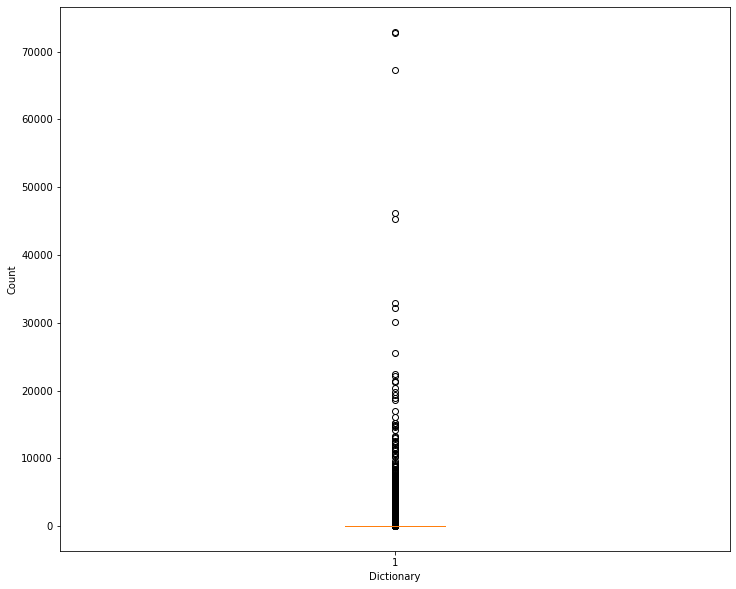

In [8]:
plt.figure(figsize=(12,10))
plt.boxplot(np.asarray(list(training_count.values())))
plt.xlabel('Dictionary')
plt.ylabel('Count')
print('Mean repetition {}'.format(np.mean(list(training_count.values()))))

### Analysis on entities positions

In [32]:
#Analysis on the entities
entities_count = {}
entities_positions = {}
for document in tqdm(training_json):
    entities_indeces = np.hstack([x['indices'] for x in document['entities']])
    for idx in entities_indeces:
        entity_info = document['words'][idx]
        if entity_info['value'] not in list(entities_count.keys()):
            entities_count[entity_info['value']] = 1
            entities_positions[entity_info['value']] = [[entity_info['region']['left'],
                                                         entity_info['region']['top'],
                                                         entity_info['region']['width'],
                                                         entity_info['region']['height'],
                                                         int(entity_info['region']['page'])]]
        else:
            entities_count[entity_info['value']] += 1
            entities_positions[entity_info['value']] += [[entity_info['region']['left'],
                                                         entity_info['region']['top'],
                                                         entity_info['region']['width'],
                                                         entity_info['region']['height'],
                                                         int(entity_info['region']['page'])]]

100%|██████████| 24073/24073 [05:43<00:00, 70.15it/s] 


In [45]:
import seaborn as sb
max_pages = np.max([ii[-1] for i in list(entities_positions.values()) for ii in i])
heatmap_shape = (2448//8,1650//8)
positions_heatmap = [np.zeros(heatmap_shape) for _ in range(max_pages)]

for word,positions in entities_positions.items():
    for position in positions:
        region_centre = [int(heatmap_shape[0]*(position[1]+position[3]/2.)),
                         int(heatmap_shape[1]*(position[0]+position[2]/2.))]
        positions_heatmap[position[-1]-1][region_centre[0],region_centre[1]] += 1


Page 1


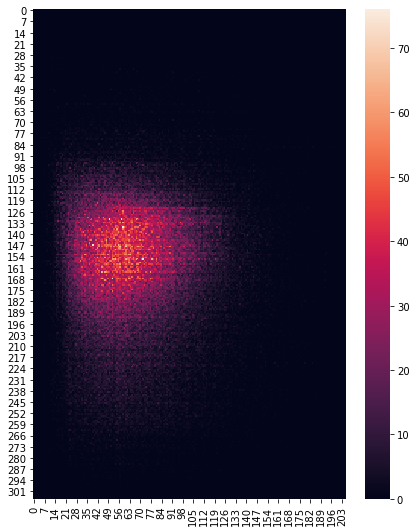

Page 2


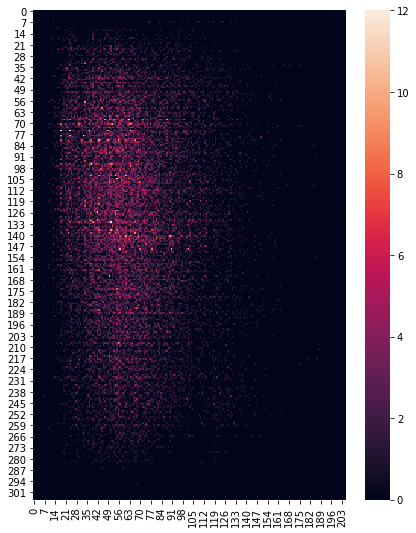

Page 3


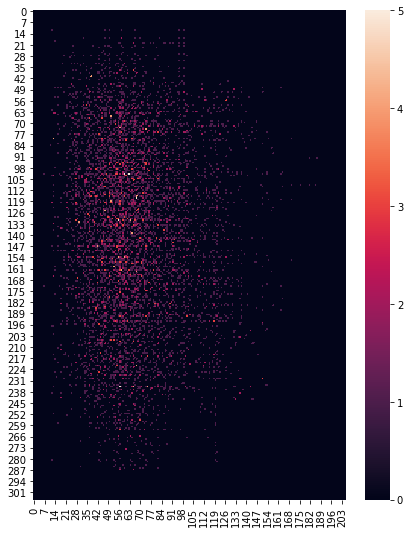

Page 4


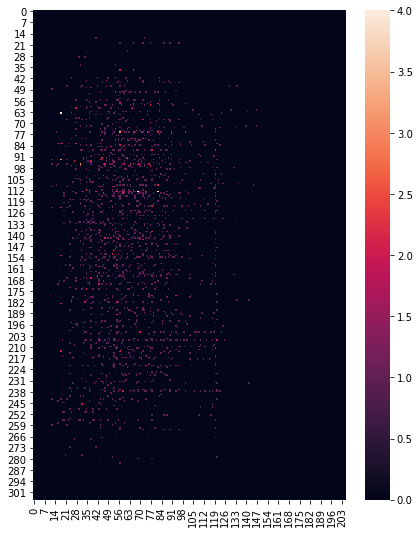

Page 5


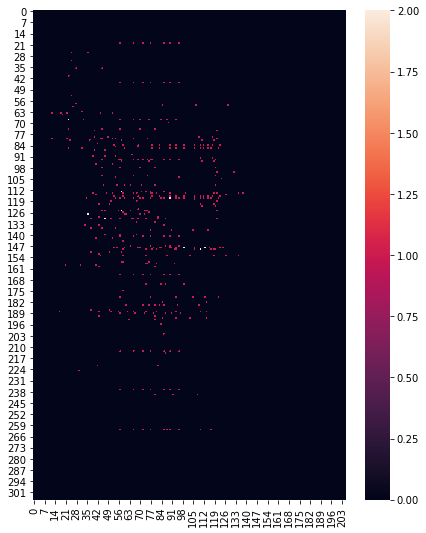

Page 6


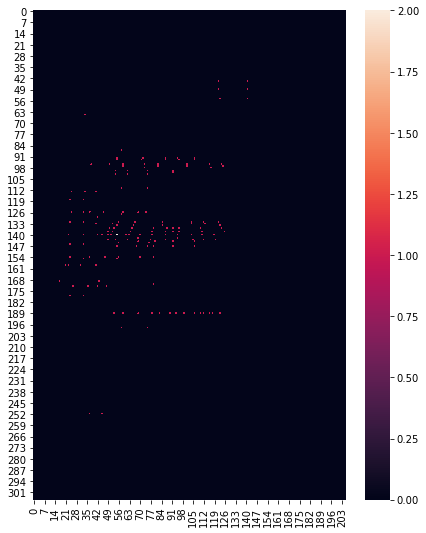

Page 7


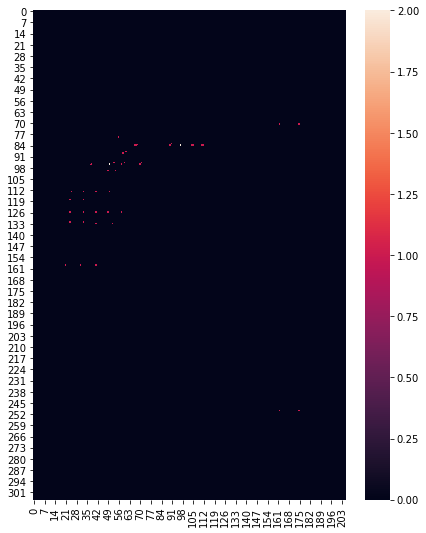

Page 8


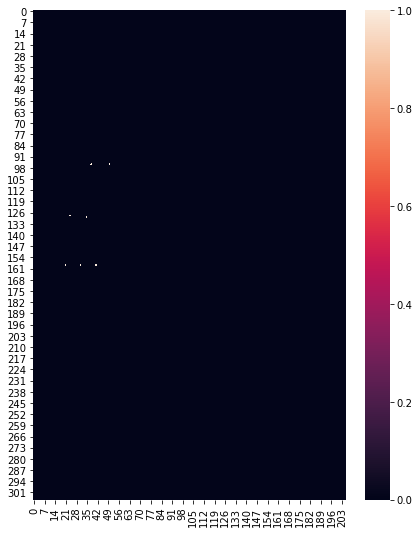

In [53]:
for i,heatmap in enumerate(positions_heatmap):
    print('Page {}'.format(i+1))
    plt.figure(figsize=(1650//230,2448//256))
    sb.heatmap(heatmap)
    plt.show()